In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
nasa=pd.read_csv("Meteorite_Landings.csv")
print(nasa.describe())
print("Mean size (g)", nasa[nasa.columns[4]].mean())
print("Medain size (g)", nasa[nasa.columns[4]].median())

                 id      mass (g)        reclat       reclong
count  45716.000000  4.558500e+04  38401.000000  38401.000000
mean   26889.735104  1.327808e+04    -39.122580     61.074319
std    16860.683030  5.749889e+05     46.378511     80.647298
min        1.000000  0.000000e+00    -87.366670   -165.433330
25%    12688.750000  7.200000e+00    -76.714240      0.000000
50%    24261.500000  3.260000e+01    -71.500000     35.666670
75%    40656.750000  2.026000e+02      0.000000    157.166670
max    57458.000000  6.000000e+07     81.166670    354.473330
Mean size (g) 13278.078548601488
Medain size (g) 32.6


In [23]:
#print((nasa[nasa.columns[4]].nlargest(5)) )
nasafall = nasa["fall"]
print("Meteorite Rank, Found/witnessed, Size (g)")
print("1st Largest",nasafall[16392], 60000000.0)
print("2nd Largest",nasafall[5373], 58200000.0) 
print("3rd Largest",nasafall[5365], 50000000.0)
print("4th Largest",nasafall[5370], 30000000.0)
print("5th Largest",nasafall[3455], 28000000.0)

Meteorite Rank, Found/witnessed, Size (g)
1st Largest Found 60000000.0
2nd Largest Found 58200000.0
3rd Largest Found 50000000.0
4th Largest Found 30000000.0
5th Largest Found 28000000.0


In [24]:
nasa.insert(10, "logmass", np.log(nasa["mass (g)"]), True)
nasa

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,logmass
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",3.044522
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",6.579251
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",11.580584
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",7.556951
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",6.659294
...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)",5.147494
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)",3.828641
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)",1.193922
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)",7.681099


AxesSubplot(0.125,0.125;0.775x0.755)


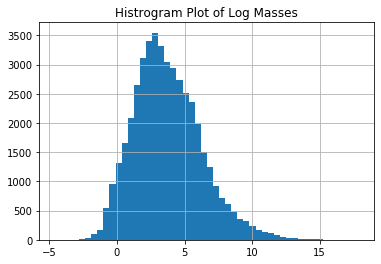

In [25]:
hist = nasa["logmass"].replace([np.inf,-(np.inf)],(np.nan))
plt.title ('Histrogram Plot of Log Masses')
print(hist.hist(bins=50))

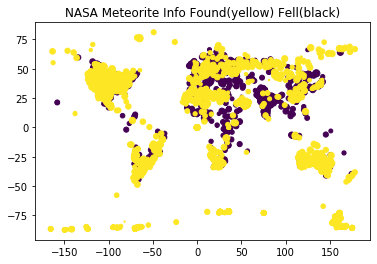

In [29]:
found = np.ones(len (nasa["fall"]))
for k in range(len (nasa["fall"])):   
    if nasa ["fall"][k] == "Fell":
        found [k] = 0  
    elif nasa ["fall"][k] == "Found":
        found [k] = 1
    else:
        found [k] = 20    
nasadata = {"reclat":nasa["reclat"],"mass":nasa["logmass"],"reclong":nasa["reclong"],"found":found}
dataframe = pd.DataFrame(nasadata, columns = ["reclat", "mass", "reclong", "found", "fall"])
plt.title('NASA Meteorite Info Found (yellow) Fell (black)')
print(plt.scatter(dataframe.reclong, dataframe.reclat, s=dataframe.mass*3, c=dataframe.found))
